In [81]:
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from numpy.polynomial import Polynomial
#import some random stuff 

In [82]:
#a
ex_a_dataframe = pnd.read_csv('ex_a.csv')
ex_a = ex_a_dataframe.to_numpy()
ex_a_x = ex_a[:, 0]
ex_a_y = ex_a[:, 1]
#Data input

In [83]:
ex_a_fit = Polynomial.fit(ex_a_x, ex_a_y, 6)
print('fitting_polynomial is ', ex_a_fit)

fitting_polynomial is  0.14491445068359382 - 0.11821231717930536·x¹ + 0.22073622242838445·x² +
0.05093256733501067·x³ - 0.92876690315755·x⁴ + 0.05798566505408465·x⁵ +
0.6533617300455719·x⁶


The resulting polinomial: 0.14491445068359382 - 0.11821231717930536·x¹ + 0.22073622242838445·x² +
0.05093256733501067·x³ - 0.92876690315755·x⁴ + 0.05798566505408465·x⁵ +
0.6533617300455719·x⁶

Creat a polinomial of the 6 oder via the numpy fit method. 
The numpy function is using the least quare method.

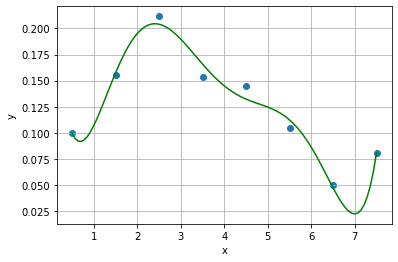

In [84]:
x_a_fit, y_a_fit = ex_a_fit.linspace()
plt.plot(x_a_fit, y_a_fit, 'g')
plt.scatter(ex_a_x, ex_a_y)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [85]:
#b

def p1(x):
    return x
def p2(x):
    return x**2
def p3(x):
    return x**3
def p4(x):
    return x**4
def p5(x):
    return x**5
def p6(x):
    return x**6


funcs = [np.ones_like, p1, p2,p3, p4,p5, p6]
def jacobi_matrix(funcs, x):
    '''Create the design matrix for a linear least squares problem'''
    return np.column_stack([f(x) for f in funcs])

C = np.eye(8, k=1) - 2*np.eye(8) + np.eye(8, k=-1)
C[0,0] = -1
C[6,6] = -1
lambd = [.1,0.3,0.7,3,10]

A = jacobi_matrix(funcs, ex_a_x)

A_t = np.transpose(A)

CA = np.matmul(C, A)
CA_t = np.transpose(CA)
polynomials = np.zeros(7)
a_reg = np.zeros(shape=(5,7))
for i in range(0,len(lambd)):
    CA_2 = lambd[i]*np.matmul(CA_t, CA)
    AA = np.matmul(A_t,A)
    A_temp = np.linalg.inv(AA + CA_2)
   
    a_reg[i,:] = np.matmul(np.matmul(A_temp,A_t),ex_a_y)

print(a_reg[0,:])
print(a_reg[1,:])
print(a_reg[2,:])
print(a_reg[3,:])
print(a_reg[4,:])


[ 1.66143384e-01 -2.51212650e-01  3.30779907e-01 -1.54932529e-01
  3.37449171e-02 -3.52650351e-03  1.42984428e-04]
[ 1.35821823e-01 -1.04011299e-01  1.51999276e-01 -6.63100760e-02
  1.27089257e-02 -1.14388292e-03  3.96030633e-05]
[ 1.26741404e-01 -2.81329383e-02  5.42337269e-02 -1.86575856e-02
  1.70065100e-03  7.44965640e-05 -1.23890480e-05]
[ 1.30606211e-01  3.53181143e-02 -3.42535145e-02  2.14991038e-02
 -6.88620673e-03  9.72085990e-04 -4.93561562e-05]
[ 1.32269216e-01  4.45116685e-02 -5.20412741e-02  2.72272960e-02
 -7.53035355e-03  9.88622546e-04 -4.84898158e-05]


Create the regularizat polonomials via the matrix multiplikation form the lecture slides.

λ = 0.1 [ 1.66143384e-01 -2.51212650e-01  3.30779907e-01 -1.54932529e-01 3.37449171e-02 -3.52650351e-03  1.42984428e-04]
λ = 0.3 [ 1.35821823e-01 -1.04011299e-01  1.51999276e-01 -6.63100760e-02 1.27089257e-02 -1.14388292e-03  3.96030633e-05]
λ = 0.7 [ 1.26741404e-01 -2.81329383e-02  5.42337269e-02 -1.86575856e-02 1.70065100e-03  7.44965640e-05 -1.23890480e-05]
λ = 3   [ 1.30606211e-01  3.53181143e-02 -3.42535145e-02  2.14991038e-02 -6.88620673e-03  9.72085990e-04 -4.93561562e-05]
λ = 10  [ 1.32269216e-01  4.45116685e-02 -5.20412741e-02  2.72272960e-02 -7.53035355e-03  9.88622546e-04 -4.84898158e-05]

As you can see the coefficients infront of the higher orders get smaller and smaller.

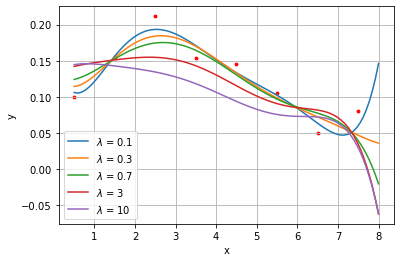

In [86]:
s = r"$\lambda \, = $"
for i in range(0,len(lambd)):
    polynom = Polynomial(a_reg[i,:])
    x_a_reg, y_a_reg = polynom.linspace(n=100,domain=[0.5,8])

    d = str(lambd[i])
    plt.plot(x_a_reg, y_a_reg,label=s+d)

plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(ex_a_x, ex_a_y,s=8,c='r')

[0.1351487  0.175403   0.18737532 0.15696212 0.12354974 0.0875602
 0.069371   0.06462986]
[0.02813606 0.02887937 0.03411031 0.03410389 0.02315323 0.01927013
 0.01226471 0.01329903]


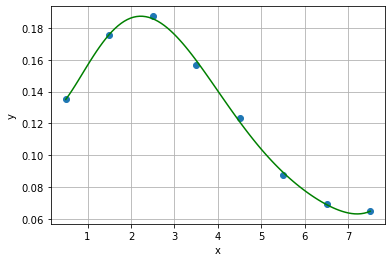

In [87]:
#c
ex_c_dataframe = pnd.read_csv('ex_c.csv')
ex_c = ex_c_dataframe.to_numpy()
ex_c_x = ex_c[:, 0]
ex_c_y_all = (ex_c[:, 1:51])
ex_c_y = np.mean(ex_c_y_all, axis=1)
ex_y_std = np.std(ex_c_y_all, axis=1)

ex_c_fit = Polynomial.fit(ex_c_x, ex_c_y, 6)
x_c_fit, y_c_fit = ex_c_fit.linspace()
plt.plot(x_c_fit, y_c_fit, 'g')
plt.scatter(ex_c_x, ex_c_y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
print(ex_c_y)
print(ex_y_std)

Calculation the mean and the std of the givin data point.
Not quit sure how to weight the uncertainties.

mean :[0.1351487  0.175403   0.18737532 0.15696212 0.12354974 0.0875602 0.069371   0.06462986]
std :[0.02813606 0.02887937 0.03411031 0.03410389 0.02315323 0.01927013 0.01226471 0.01329903]